<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Import tqdm for progress bar
from tqdm.auto import tqdm

2.0.1+cpu


c:\Users\kklr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# smartphone industry: camera and photo apps use computer vision to enhance and sort images

# car industry: modern cars use computer vision to identify objects such as other cars, and to stay within lane lines

# manufacturers: use computer vision to identify defects in products

# security: cameras use computer vision to detect potential intruders

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [4]:
# when a ML model predicts accurately for training daa but not for new data/test data
# it means that instead of generalizing it attempts to predict every data point

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# L1, L2 regularization: penalizes the sum of squares of the weights

# RF: pruning

# Neural networks: dropout, Weight regularization, data augmentation (create more samples: e.g. rotate, flip, crop an image)

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [85]:
import os
print(os.getcwd()) 
os.chdir('c:\\Users\\kklr\\Documents\\Python\\Courses\\PyTorch') 

c:\Users\kklr\Documents\Python\Courses\PyTorch


In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=False, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=False, # False, because it's already been downloaded
    transform=ToTensor()
)

# labels
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '0 - zero')

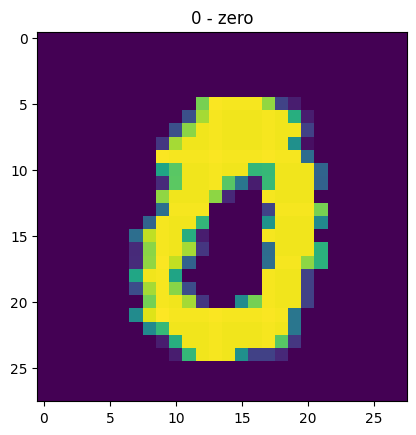

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[69]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])



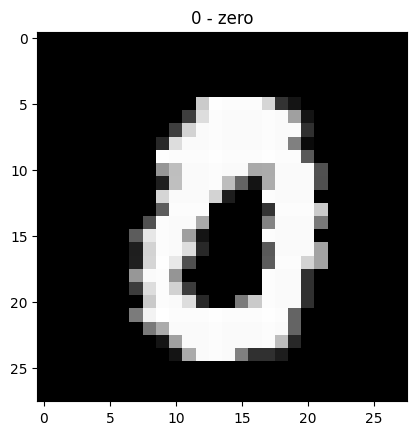

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

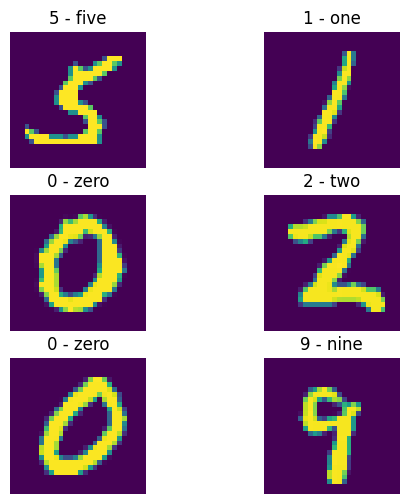

In [10]:
# Loop to get five different samples
torch.manual_seed(420)

fig = plt.figure(figsize = (6,6))
rows, cols = 3,2
for i in range( 1, rows*cols + 1):
    random_idx = torch.randint(1, len(train_data), size =[1]).item() 
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False);
    
    

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C47A276920>, <torch.utils.data.dataloader.DataLoader object at 0x000001C47A116260>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [12]:
class MNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        
        
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x
        
        
torch.manual_seed(420)
model_2 = MNISTModel(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


model_2

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
# Loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

# accuracy
from helper_functions import accuracy_fn 

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [14]:
torch.manual_seed(420)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

# train and test model

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    # training
    train_loss = 0
    
    # loop to loop through batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        # forward pass
        y_pred = model_2(X)
        
        # calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumatively add up the loss per epoch
        
        # optimizer zero grad
        optimizer.zero_grad()
        
        # loss backward
        loss.backward()
        
        # optimizer step
        optimizer.step()
        
        
        # print the no of samples seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
            
     # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    
    # Testing
    test_loss, test_acc = 0,0
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # forward pass
            test_pred = model_2(X)
            
            # calcuate loss accumatively
            test_loss += loss_fn(test_pred, y)
            # calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        
        # # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=str(next(model_2.parameters()).device))



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples


Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:29<01:57, 29.35s/it]


Train loss: 1.76488 | Test loss: 0.28220, Test acc: 91.56%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:58<01:28, 29.42s/it]


Train loss: 0.19033 | Test loss: 0.12638, Test acc: 95.97%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [01:26<00:57, 28.61s/it]


Train loss: 0.11694 | Test loss: 0.10533, Test acc: 96.57%

Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [01:58<00:29, 29.97s/it]


Train loss: 0.09055 | Test loss: 0.07977, Test acc: 97.53%

Epoch: 4
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [02:34<00:00, 30.92s/it]


Train loss: 0.07725 | Test loss: 0.05768, Test acc: 98.19%

Train time on cpu: 154.607 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [15]:
# 1. Logits
# model_2: input shape (batch_size, channels, height, width) = 4 dimensions
# test_data[0][0] is only three dimensions. Thus, unsqueeze() adds an extra dimension
model_pred_logits = model_2(test_data[0][0].unsqueeze(dim=0)) 

# 2. prediction probabilities (logits -> predictions probabilities) 
"""
In most classification tasks, you'd use dim=1 because you typically care about classifying individual data points. dim=1 gives you class probabilities for each data point. 
dim=0 is less common and might be used in specialized scenarios where you want to know how classes are distributed across different data points.
"""
model_pred_prob = torch.softmax(model_pred_logits, dim=1)

 # 3. Turn the prediction probabilities into prediction labels by taking the argmax()
model_pred_labels = torch.argmax(model_pred_prob, dim=1)

model_pred_labels
# prediction is label = 7



tensor([7])

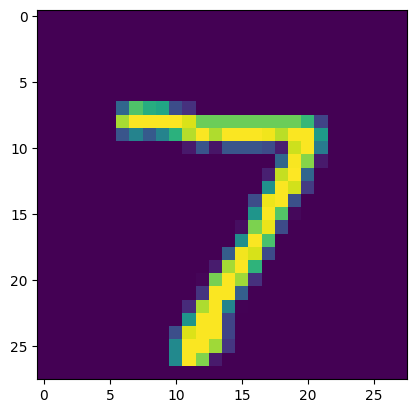

In [16]:
prediction = plt.imshow(test_data[0][0].squeeze())
prediction

In [17]:
test_data[0][0].shape, test_data[0][0].squeeze().shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

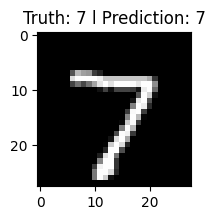

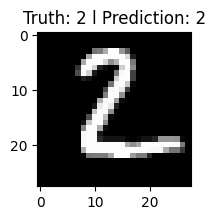

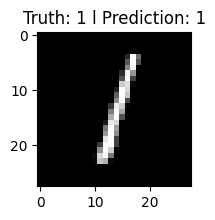

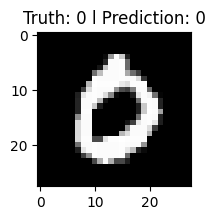

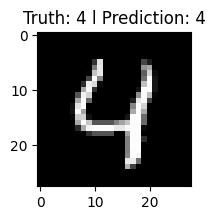

In [23]:
# visualizing the predictions

images = 5

for i in range(images):
    
    # get image 
    img = test_data[i][0]
    # get label
    label = test_data[i][1]
    
    # make predictions
    model_pred_logits = model_2(img.unsqueeze(dim=0)) # logits
    model_pred_prob = torch.softmax(model_pred_logits, dim=1) # pred probabilities
    model_pred_classes = torch.argmax(model_pred_prob, dim=1) # pred probabilities -> pred labels
    

    plt.figure(figsize=(2,2))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} l Prediction: {model_pred_classes.item()}")
    
    
    

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [33]:
# libraries
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
print(mlxtend.__version__)


0.22.0


To make a confusion matrix, we'll go through three steps:

* 1  Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
* 2 Make a confusion matrix using torchmetrics.ConfusionMatrix.
* 3 Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().


In [46]:
# 1. make prediction with our trained model, model_2
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='making predictions'):
        # send data and targets to target device
        X, y = X.to(device), y.to(device)
        
        # forward pass
        y_logit = model_2(X)
        
        # logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        
        # send preds to CPU
        y_preds.append(y_pred.cpu())
        
y_pred_tensor = torch.cat(y_preds)


making predictions: 100%|██████████| 313/313 [00:01<00:00, 162.96it/s]


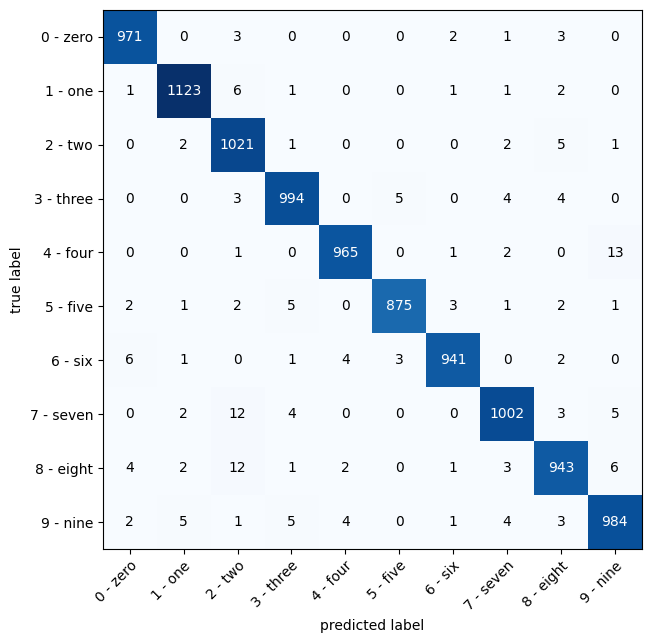

In [49]:
# 2. create confusion matrix
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. plot the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [55]:
# creating a random tensor
rand_tensor = torch.rand(size=(1, 3, 64, 64))
rand_tensor.shape

torch.Size([1, 3, 64, 64])

In [84]:
# create layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=10,
                       stride=1,
                       padding=1)

conv_rand_tensor = conv_layer(rand_tensor)

print(f"Rand tensor original shape {rand_tensor.shape}")
print(f"Rand tensor conv2d shape {conv_rand_tensor.shape}")

# smaller kernel size captures more detail
# when increasing the kernel size the shape of the conv2d tensor changes

# orginal ([1, 3, 64, 64])
# The spatial dimensions are 64x64

# conv2d ([1, 64, 57, 57])
# the kernel size slides over the input and reduces it. Becuase a larger kernel size covers a larger portion of the input data

# torch.size([batch_size, channels, height, width])
# batch_size is the data. batch_size = 1 means there's only one example
# channels determine how the network learns features. more channels allows for richer feature space but increases computational costs
# height/number of rows
# width/number of columns



Rand tensor original shape torch.Size([1, 3, 64, 64])
Rand tensor conv2d shape torch.Size([1, 64, 57, 57])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

* 1. download data
* 2. prepare test and training data using dataloader
* 3. create model
* 4. setup loss function and optimizer

In [86]:
# 1. prepare data for fashion mnist

from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data_f = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=False, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data_f = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=False, # False, because it's already been downloaded
    transform=ToTensor()
)

# labels
class_names_f = train_data_f.classes
class_names_f 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [154]:
# 2. prepare test and training data using dataloader

from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

train_dataloader_f = DataLoader(train_data_f, # dataset to turn into iterable
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_f = DataLoader(test_data_f,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Dataloaders: {train_dataloader_f, test_dataloader_f}") 
print(f"Length of train dataloader: {len(train_dataloader_f)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader_f)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C422F843D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001C422F844C0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [169]:
# 3. create model

class FashionMNIST(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        
        
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x
        
        
torch.manual_seed(420)
model_2_f = FashionMNIST(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names_f)).to(device)


model_2_f

FashionMNIST(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [112]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader_f))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [171]:
# 4. setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2_f.parameters(),
                            lr=0.01)

# accuracy
from helper_functions import accuracy_fn 

In [172]:
# 5. train the model

torch.manual_seed(420)

# train and test model

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    # training
    train_loss = 0
    
    # loop to loop through batches
    for batch, (X, y) in enumerate(train_dataloader_f):
        model_2_f.train()
        # forward pass
        y_pred = model_2_f(X)
        
        # calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumatively add up the loss per epoch
        
        # optimizer zero grad
        optimizer.zero_grad()
        
        # loss backward
        loss.backward()
        
        # optimizer step
        optimizer.step()
        
        
        # print the no of samples seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader_f.dataset)} samples")
            
            
     # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader_f)
    
    
    # Testing
    test_loss, test_acc = 0,0
    model_2_f.eval()
    with torch.inference_mode():
        for X, y in test_dataloader_f:
            # forward pass
            test_pred = model_2_f(X)
            
            # calcuate loss accumatively
            test_loss += loss_fn(test_pred, y)
            # calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader_f)
        
        # # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader_f)
    
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=str(next(model_2_f.parameters()).device))



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:27<01:51, 27.75s/it]


Train loss: 1.19635 | Test loss: 0.60730, Test acc: 78.12%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:58<01:27, 29.24s/it]


Train loss: 0.52565 | Test loss: 0.52783, Test acc: 79.77%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [01:29<01:00, 30.21s/it]


Train loss: 0.44838 | Test loss: 0.44376, Test acc: 84.38%

Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [01:59<00:30, 30.23s/it]


Train loss: 0.40982 | Test loss: 0.41394, Test acc: 84.87%

Epoch: 4
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [02:30<00:00, 30.03s/it]


Train loss: 0.38090 | Test loss: 0.39188, Test acc: 86.37%

Train time on cpu: 27557.998 seconds


In [100]:
# changing the kernel size makes the output dimensions change.
# e.g. when changing the kernel size in 

TypeError: 'DataLoader' object is not subscriptable